
# COURSE: Neural signal processing and analysis: Zero to hero

SESSION: Introduction #16. MATLAB: EEG Dataset AND Introduction #17. MATLAB: V1 Laminar

TEACHER: Mike X Cohen, sincxpress.com

Originally translated to Python by dxganta.

**Goal:** Become familiar with the sample data used in class

Before beginning, make sure to *import* these libraries below. This loads extra functions into our workspace, which we will be using later.

In [1]:
import sys
sys.path.insert(1, '../') #used to so that we can find our custom utils library later

# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from utils import * #contains custom functions for this course

## Start with the EEG Data - Exploring the Data

Our first command is `eeg = read_sampleEEGdata()`. This custom command reads the sampleEEGdata.mat file and converts it into a format that is easily compatible with the MNE library. Now we can easily access the eeg data later, by using the variable `eeg`.

In [2]:
# Load the sample EEG data. 
eeg = read_sampleEEGdata("../data/sampleEEGdata.mat")

Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated


Now, we can inspect this data! Because this is an MNE 'Epoch" object, we can just call it directly, instead of using print. Cohen asks, what fields do you see in the data (i.e. what does `eeg` contain)?

In [3]:
eeg

<EpochsArray | 99 events (all good), -1 – 1.496 s (baseline off), ~31.0 MiB, data loaded,
 '1': 99>

Now, we should explore more closely.... Cohen asks you the following questions....
- how many channels/timepoints/trials? *(note. MNE calls trials "events")*
- where is time = 0?
- what is the sampling rate?

In [4]:
# how many channels/timepoints/trials?
print(f"number of channels: {len(eeg.ch_names)}")
print(f"number of timepoints: {len(eeg.times)}")
print(f"number of epochs (i.e. trials): {len(eeg.events)}")


number of channels: 64
number of timepoints: 640
number of epochs (i.e. trials): 99


In [5]:
# what was the sampling rate?
print(f"sampling rate (Hz): {eeg.info['sfreq']}")

sampling rate (Hz): 256.0


In [6]:
#what are the min and max time of a trial? # these are measured in seconds
print(f"minimum trial time (seconds): {min(eeg.times)}")
print(f"maximum trial time (seconds): {max(eeg.times)}")

minimum trial time (seconds): -1.0
maximum trial time (seconds): 1.49609375


In [7]:
#what is in 'times'?
print(eeg.times)

[-1.         -0.99609375 -0.9921875  -0.98828125 -0.984375   -0.98046875
 -0.9765625  -0.97265625 -0.96875    -0.96484375 -0.9609375  -0.95703125
 -0.953125   -0.94921875 -0.9453125  -0.94140625 -0.9375     -0.93359375
 -0.9296875  -0.92578125 -0.921875   -0.91796875 -0.9140625  -0.91015625
 -0.90625    -0.90234375 -0.8984375  -0.89453125 -0.890625   -0.88671875
 -0.8828125  -0.87890625 -0.875      -0.87109375 -0.8671875  -0.86328125
 -0.859375   -0.85546875 -0.8515625  -0.84765625 -0.84375    -0.83984375
 -0.8359375  -0.83203125 -0.828125   -0.82421875 -0.8203125  -0.81640625
 -0.8125     -0.80859375 -0.8046875  -0.80078125 -0.796875   -0.79296875
 -0.7890625  -0.78515625 -0.78125    -0.77734375 -0.7734375  -0.76953125
 -0.765625   -0.76171875 -0.7578125  -0.75390625 -0.75       -0.74609375
 -0.7421875  -0.73828125 -0.734375   -0.73046875 -0.7265625  -0.72265625
 -0.71875    -0.71484375 -0.7109375  -0.70703125 -0.703125   -0.69921875
 -0.6953125  -0.69140625 -0.6875     -0.68359375 -0

In [8]:
#where is the data?
print(eeg.get_data())

[[[-9.13974873e-06 -1.46348466e-05 -1.04608271e-05 ... -1.21047169e-05
   -2.31101840e-05 -1.13979359e-05]
  [-8.07205288e-06 -7.21636161e-06 -5.40413339e-06 ...  2.22961444e-06
   -1.23106302e-05 -1.92788821e-06]
  [-4.48866967e-06 -8.06539720e-06 -2.21437836e-06 ... -9.11283132e-06
   -4.91206920e-05 -1.07135784e-05]
  ...
  [ 1.92200355e-06  5.12257429e-06  7.32051740e-06 ... -1.21596495e-05
   -1.95154444e-05 -8.55870076e-06]
  [ 3.06594666e-06  8.58926524e-06  1.00121651e-05 ...  1.53253150e-05
    6.33258878e-06  2.04185490e-05]
  [-4.75039815e-06 -5.74052183e-06 -2.24600558e-06 ... -2.53948438e-05
   -3.10734504e-05 -2.18046080e-05]]

 [[ 1.64775283e-05  1.77741622e-05  1.74904762e-05 ... -9.66050175e-06
   -2.68142821e-06 -3.09293591e-06]
  [ 1.35167529e-05  9.27325345e-06  1.14261211e-05 ... -2.22090898e-06
   -5.89138267e-07  3.31700517e-06]
  [ 1.90465053e-05  2.29510861e-05  2.53336548e-05 ...  4.59657713e-06
    8.87790884e-06 -3.02257331e-06]
  ...
  [ 7.32926310e-07 -9.1

In [9]:
#what channel information do we have?
print(eeg.get_montage().ch_names) #a different way to see our channel names
print(eeg.get_montage().get_positions()) #channels, by name, with their coordinate location

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
{'ch_pos': OrderedDict([('Fp1', array([ 0.02613301,  0.08078401, -0.00400108])), ('AF7', array([ 0.04970943,  0.06869108, -0.0059589 ])), ('AF3', array([0.0314828 , 0.07615277, 0.02084681])), ('F1', array([0.02604209, 0.05991273, 0.05438082])), ('F3', array([0.04820043, 0.05755106, 0.03986971])), ('F5', array([0.06305822, 0.05403789, 0.01812643])), ('F7', array([ 0.06842334,  0.04987138, -0.00748952])), ('FT7', array([ 0.08041001,  0.0262075 , -0.0085086 ])), ('FC5', array([0.07624736, 0.02876282, 0.02416691])), ('FC3', array([0.05927498, 0.03095528, 0.0524714 ])), ('FC1', arr

In [10]:
for pos in eeg.get_montage().get_positions():
  print(pos, eeg.get_montage().get_positions()[pos])

ch_pos OrderedDict([('Fp1', array([ 0.02613301,  0.08078401, -0.00400108])), ('AF7', array([ 0.04970943,  0.06869108, -0.0059589 ])), ('AF3', array([0.0314828 , 0.07615277, 0.02084681])), ('F1', array([0.02604209, 0.05991273, 0.05438082])), ('F3', array([0.04820043, 0.05755106, 0.03986971])), ('F5', array([0.06305822, 0.05403789, 0.01812643])), ('F7', array([ 0.06842334,  0.04987138, -0.00748952])), ('FT7', array([ 0.08041001,  0.0262075 , -0.0085086 ])), ('FC5', array([0.07624736, 0.02876282, 0.02416691])), ('FC3', array([0.05927498, 0.03095528, 0.0524714 ])), ('FC1', array([0.03235138, 0.03243618, 0.07159806])), ('C1', array([3.45373740e-02, 2.11480423e-18, 7.76670445e-02])), ('C3', array([6.31712807e-02, 3.86812534e-18, 5.68716915e-02])), ('C5', array([8.08315480e-02, 4.94950483e-18, 2.62918398e-02])), ('T7', array([ 8.45385386e-02,  5.17649254e-18, -8.84508251e-03])), ('TP7', array([ 0.08041001, -0.0262075 , -0.0085086 ])), ('CP5', array([ 0.07624736, -0.02876282,  0.02416691])), (

In [11]:
#look at only 1 channel, how about channel "10"
#MATLAB STARTS COUNTING AT 1, PYTHON STARTS COUNTING AT 0
# so channel 10 in matlab is channel 9 in python
channel=eeg.ch_names[9]
print(channel)
print(eeg.get_data(picks=channel))
print(eeg.get_montage().get_positions()["ch_pos"][channel])

FC3
[[[-3.50623714e-06 -6.00954479e-07  1.97955296e-06 ...  1.02087995e-06
   -1.59937208e-05 -2.57994202e-06]]

 [[ 1.19498945e-05  7.32832859e-06  9.86816030e-06 ...  8.42505051e-06
    1.38656869e-05  1.30422768e-05]]

 [[-4.03476719e-08  2.04884600e-06  3.96051973e-06 ... -2.15835303e-06
   -1.91929939e-06  6.77024809e-06]]

 ...

 [[ 1.12216012e-05  1.89210768e-05  1.65966030e-05 ... -3.05737412e-05
   -2.76281553e-05 -2.77501895e-05]]

 [[-3.59462115e-06 -6.50276797e-06 -1.30978469e-06 ... -6.27582722e-06
   -6.43590010e-06 -1.14367467e-05]]

 [[-9.15969667e-06 -1.17902600e-05 -1.63878449e-05 ...  2.02881824e-06
   -1.46947707e-06 -3.01884097e-06]]]
[0.05927498 0.03095528 0.0524714 ]


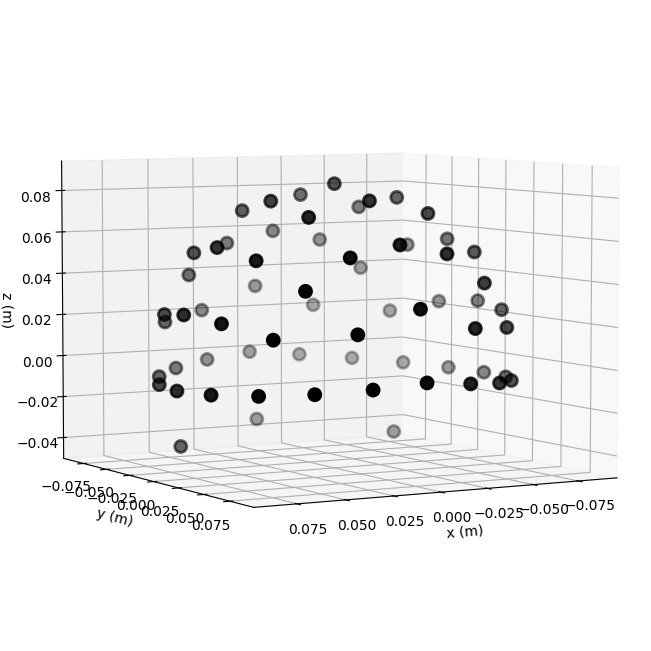

In [12]:
#plotting the channels 3d version
fig_3d = eeg.plot_sensors(kind="3d",show=False) #don't show the figure right away
fig_3d = fig_3d.gca().view_init(azim=60, elev=5) #adjusts the angle, you can play around with these numbers

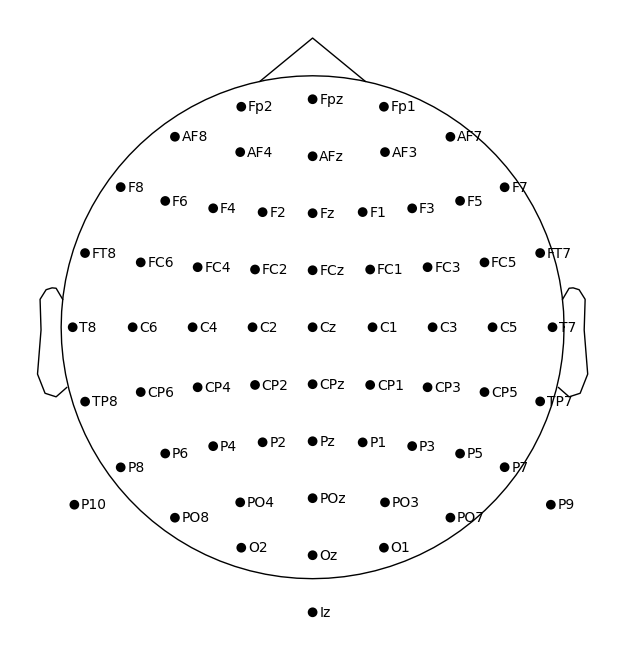

In [13]:
#topoplot version
fig_2d = eeg.plot_sensors(show_names=True, show = False)

## Plotting ERPs and topographical maps

In [14]:
# Compute the ERP of each channel
# (remember that the ERP is the time-domain average across all trials at each time point)
erp = eeg.average()
erp

<Evoked | '1' (average, N=99), -1 – 1.4961 s, baseline off, 64 ch, ~410 KiB>

Now, pick a channel and plot the ERP

Need more than one channel to make topography for eeg. Disabling interactivity.


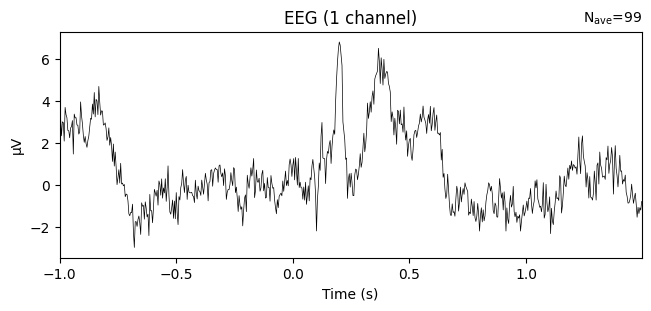

In [17]:
erp_timecourse = erp.plot(picks="FCz", show = False)

Instead of plotting all the timepoints for 1 electrode, let's plot 1 timepoint for all the electrodes.

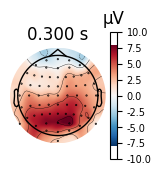

In [24]:
# Plot topographical maps
time2plot = .300 # in s
erp_topo = erp.plot_topomap(times = time2plot, vlim=(-8,8),show = False)


## Now for sample CSD V1 Data

Lecture "17-MATLAB: V1 dataset" begins here

In [ ]:
# load the laminar data
laminar_data = loadmat('../data/v1_laminar.mat')

In [ ]:
# Extract variables from the loaded mat file
csd = laminar_data['csd']
timevec = laminar_data['timevec']

# Plot ERP from channel 7
plt.figure(3, figsize=(10,6))
plt.plot(timevec.T, np.mean(csd[6, :, :], axis=1))
plt.plot(plt.gca().get_xlim(), [0, 0], 'k--')
plt.plot([0, 0], plt.gca().get_ylim(), 'k--')
plt.plot(np.array([0, 0]) + 0.5, plt.gca().get_ylim(), 'k--')
plt.xlabel('Time (s)')
plt.ylabel('Activity (\u03BCV)')
plt.xlim(-0.1, 1.4)

In [ ]:
X = timevec
Y = np.arange(1,17)
Z = np.squeeze(np.mean(csd, axis=2))

# Plot depth-by-time image of ERP
plt.figure(4, figsize=(8,5))
plt.contourf(X.reshape((1527,)), Y, Z, 40, cmap='jet')
plt.xlim(0, 1.3)
plt.xlabel('Time (sec.)')
plt.ylabel('Cortical depth')

# Show the plots
plt.show()